<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_3_6)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,29.830738,86.690350,0.000087,126.521175,126.520778,0.000397
1,0.0,1.0,31.575927,67.262980,0.000163,108.839070,108.838753,0.000317
2,0.0,2.0,42.555683,57.051423,-0.000737,109.606369,109.607074,-0.000705
3,0.0,3.0,52.695305,49.689340,0.000005,112.384650,112.384710,-0.000060
4,0.0,4.0,84.926103,47.004251,0.000273,141.930627,141.930571,0.000057
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,38.120294,39.007170,0.000003,87.127468,87.127481,-0.000013
29996,999.0,26.0,29.838145,31.538385,-0.001092,71.375437,71.376527,-0.001090
29997,999.0,27.0,74.552880,59.032782,-0.000047,143.585615,143.586019,-0.000403
29998,999.0,28.0,85.341587,35.572438,-0.001581,130.912444,130.915080,-0.002636


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    29.830738  86.690350  0.000087  126.521175  126.520778  0.000397
      1.0    31.575927  67.262980  0.000163  108.839070  108.838753  0.000317
      2.0    42.555683  57.051423 -0.000737  109.606369  109.607074 -0.000705
      3.0    52.695305  49.689340  0.000005  112.384650  112.384710 -0.000060
      4.0    84.926103  47.004251  0.000273  141.930627  141.930571  0.000057
...                ...        ...       ...         ...         ...       ...
999.0 25.0   38.120294  39.007170  0.000003   87.127468   87.127481 -0.000013
      26.0   29.838145  31.538385 -0.001092   71.375437   71.376527 -0.001090
      27.0   74.552880  59.032782 -0.000047  143.585615  143.586019 -0.000403
      28.0   85.341587  35.572438 -0.001581  130.912444  130.915080 -0.002636
      29.0   83.232163  47.480766  0.000337  140.713267  140.713699 -0.000432

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    29.830738  86.690350  0.000087  126.521175  126.520778  0.000397
      1.0    31.575927  67.262980  0.000163  108.839070  108.838753  0.000317
      2.0    42.555683  57.051423 -0.000737  109.606369  109.607074 -0.000705
      3.0    52.695305  49.689340  0.000005  112.384650  112.384710 -0.000060
      4.0    84.926103  47.004251  0.000273  141.930627  141.930571  0.000057
...                ...        ...       ...         ...         ...       ...
999.0 25.0   38.120294  39.007170  0.000003   87.127468   87.127481 -0.000013
      26.0   29.838145  31.538385 -0.001092   71.375437   71.376527 -0.001090
      27.0   74.552880  59.032782 -0.000047  143.585615  143.586019 -0.000403
      28.0   85.341587  35.572438 -0.001581  130.912444  130.915080 -0.002636
      29.0   83.232163  47.480766  0.000337  140.713267  140.713699 -0.000432

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,29.830738,86.690350,0.000087,126.521175,126.520778,0.000397
1,0.0,1.0,31.575927,67.262980,0.000163,108.839070,108.838753,0.000317
2,0.0,2.0,42.555683,57.051423,-0.000737,109.606369,109.607074,-0.000705
3,0.0,3.0,52.695305,49.689340,0.000005,112.384650,112.384710,-0.000060
4,0.0,4.0,84.926103,47.004251,0.000273,141.930627,141.930571,0.000057
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,38.120294,39.007170,0.000003,87.127468,87.127481,-0.000013
29996,999.0,26.0,29.838145,31.538385,-0.001092,71.375437,71.376527,-0.001090
29997,999.0,27.0,74.552880,59.032782,-0.000047,143.585615,143.586019,-0.000403
29998,999.0,28.0,85.341587,35.572438,-0.001581,130.912444,130.915080,-0.002636


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    29.830738  86.690350  0.000087  126.521175  126.520778  0.000397
      1.0    31.575927  67.262980  0.000163  108.839070  108.838753  0.000317
      2.0    42.555683  57.051423 -0.000737  109.606369  109.607074 -0.000705
      3.0    52.695305  49.689340  0.000005  112.384650  112.384710 -0.000060
      4.0    84.926103  47.004251  0.000273  141.930627  141.930571  0.000057
...                ...        ...       ...         ...         ...       ...
999.0 25.0   38.120294  39.007170  0.000003   87.127468   87.127481 -0.000013
      26.0   29.838145  31.538385 -0.001092   71.375437   71.376527 -0.001090
      27.0   74.552880  59.032782 -0.000047  143.585615  143.586019 -0.000403
      28.0   85.341587  35.572438 -0.001581  130.912444  130.915080 -0.002636
      29.0   83.232163  47.480766  0.000337  140.713267  140.713699 -0.000432

[30000 rows x 6 columns]

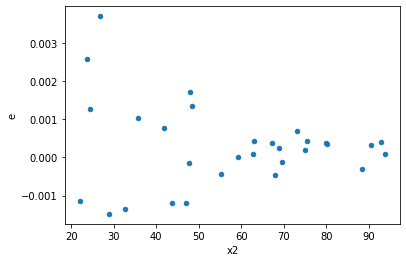

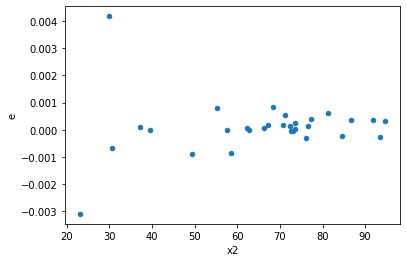

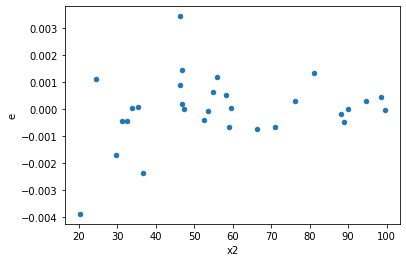

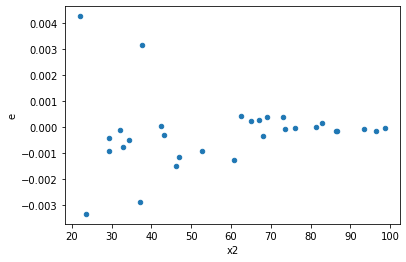

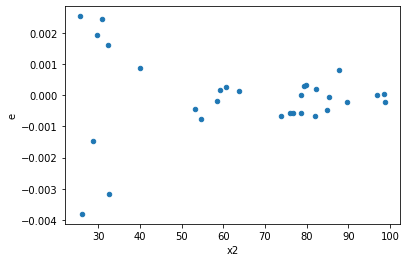

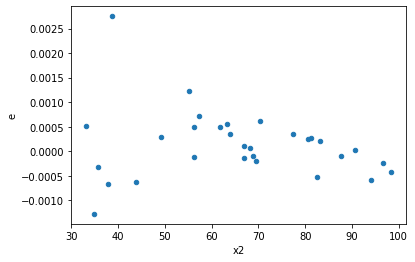

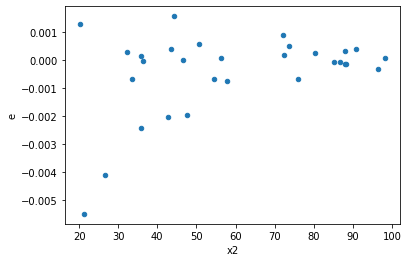

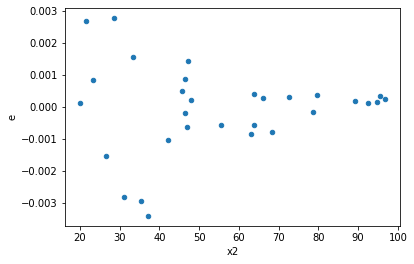

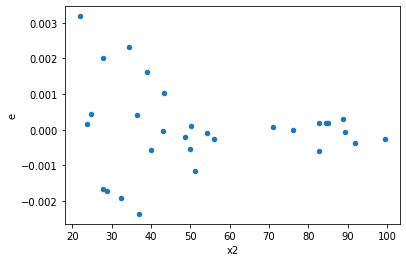

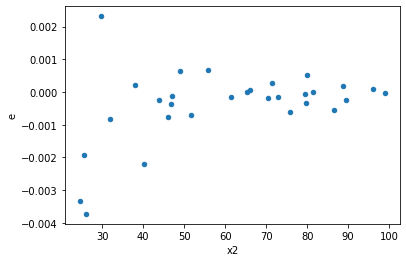

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,12.0,14.0,8.520223816011568e-06,1.9580448634916545e-05,7.100186513342973e-07,1.3986034739226104e-06,1.969812301823755,0.2267121148520579,0.8866439425739711,0.11335605742602894,Reject005=1 : Homoscedasticity
1.0,14.0,12.0,3.49080516779381e-06,8.333946777002761e-06,2.493432262709864e-07,6.944955647502301e-07,2.785299505170643,0.08294936461114233,0.9585253176944288,0.041474682305571164,Reject005=1 : Homoscedasticity
8.0,18.0,8.0,2.347881481145915e-06,6.066571910127236e-05,1.3043786006366195e-07,7.583214887659045e-06,58.13660914061266,3.124234486229227e-06,0.9999984378827569,1.5621172431146135e-06,Reject005=0 : Heteroscedasticity
11.0,10.0,16.0,1.5819662729022835e-06,2.902191328096545e-05,1.5819662729022834e-07,1.8138695800603406e-06,11.465918149649337,3.1606130784345154e-05,0.9999841969346078,1.5803065392172577e-05,Reject005=0 : Heteroscedasticity
12.0,19.0,7.0,2.1443757972934585e-05,9.373926981718668e-06,1.1286188406807676e-06,1.3391324259598097e-06,1.1865231889555052,0.8674857185155536,0.5662571407422232,0.4337428592577768,Reject005=1 : Homoscedasticity
13.0,11.0,15.0,4.7552468867132096e-07,5.162270305634047e-05,4.322951715193827e-08,3.4415135370893644e-06,79.61027010765625,6.077427450179584e-11,0.9999999999696129,3.038713725089792e-11,Reject005=0 : Heteroscedasticity
14.0,14.0,12.0,2.171638481134988e-05,2.296940781649139e-05,1.5511703436678486e-06,1.914117318040949e-06,1.233982667251675,0.7226150974429697,0.6386924512785151,0.36130754872148485,Reject005=1 : Homoscedasticity
15.0,13.0,13.0,2.2524283282055377e-06,9.548673484254248e-06,1.7326371755427214e-07,7.345133449426345e-07,4.239279609780736,0.014021736646352867,0.9929891316768236,0.0070108683231764335,Reject005=0 : Heteroscedasticity
21.0,10.0,16.0,2.3788792626696856e-06,3.75066004683073e-05,2.3788792626696855e-07,2.3441625292692064e-06,9.854062650655425,8.457986978593901e-05,0.999957710065107,4.2289934892969505e-05,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,12.0,14.0,8.520223816011568e-06,1.9580448634916545e-05,7.100186513342973e-07,1.3986034739226104e-06,1.969812301823755,0.2267121148520579,Reject005=1 : Homoscedasticity
1.0,14.0,12.0,3.49080516779381e-06,8.333946777002761e-06,2.493432262709864e-07,6.944955647502301e-07,2.785299505170643,0.08294936461114233,Reject005=1 : Homoscedasticity
2.0,13.0,13.0,0.00012661774528208573,4.182569198493011e-06,9.739826560160441e-06,3.217360921917701e-07,0.033033041215311976,2.913309453645842e-07,Reject005=0 : Heteroscedasticity
3.0,13.0,13.0,7.597311981078007e-06,6.0538402810752515e-06,5.844086139290775e-07,4.656800216211732e-07,0.7968397633469637,0.6882720761985754,Reject005=1 : Homoscedasticity
4.0,15.0,11.0,0.00011673610936074827,9.67815900829702e-07,7.782407290716552e-06,8.798326371179109e-08,0.011305404667877538,2.81203736351608e-11,Reject005=0 : Heteroscedasticity
5.0,16.0,10.0,2.4796251111032488e-05,1.5503158790984052e-06,1.5497656944395305e-06,1.550315879098405e-07,0.10003550115097067,7.71516834380147e-05,Reject005=0 : Heteroscedasticity
6.0,16.0,10.0,2.4149579338313507e-05,3.78394159822677e-06,1.5093487086445942e-06,3.78394159822677e-07,0.25070029056604,0.013925026279655427,Reject005=0 : Heteroscedasticity
7.0,18.0,8.0,1.8932427170052905e-05,3.1015157742635066e-06,1.0518015094473836e-06,3.876894717829383e-07,0.36859566020838885,0.07494394960623171,Reject005=1 : Homoscedasticity
8.0,18.0,8.0,2.347881481145915e-06,6.066571910127236e-05,1.3043786006366195e-07,7.583214887659045e-06,58.13660914061266,3.124234486229227e-06,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    733
Reject005=1 : Homoscedasticity      267
Name: Result_test, dtype: int64